In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv("movies.csv")
df.dropna()
#one hot encode watch count
for i in range(len(df.watch_count)):
  if (df.watch_count[i]) == "Previously watched":
    df.watch_count[i] = 1
  else:
    df.watch_count[i] = 0

#one hot encode turning point
for i in range(len(df.turning_point)):
  if (df.turning_point[i]) == "No":
    df.turning_point[i] = 0
  else:
    df.turning_point[i] = 1

#one hot encode plot twist
for i in range(len(df.plot_twist)):
  if df.plot_twist[i] == "No":
    df.plot_twist = 0
  else:
    df.plot_twist = 1


<ipython-input-3-fab1ef2baf86>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.watch_count[i] = 0
<ipython-input-3-fab1ef2baf86>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.watch_count[i] = 1
<ipython-input-3-fab1ef2baf86>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.turning_point[i] = 0
<ipython-input-3-fab1ef2baf86>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
sent_columns_tokenized = ['title', 'plot', 'tropes', 'important_attributes', 'title', 'genres']
word_columns_tokenized = ['protagonist_characteristics','antagonist_characteristics', 'beginning_qualities','ending_qualities','climax_qualities', 'drive', 'dialogue_characteristics', 'attributes', 'artistic_objectives','successful_objectives', 'themes', 'stars']

#Tokenize word based responses
for i in word_columns_tokenized:
  for j in df[i]:
    if j != "" and type(j) == str:
      df[i]=df[i].apply(str)
      j = word_tokenize(j)
#Tokenize sentence based responses
for i in sent_columns_tokenized:
  for j in df[i]:
    if j != "" and type(j) == str:
      df[i]=df[i].apply(str)
      j = word_tokenize(j)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error

In [ ]:
def process_data_vectorized(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  vectorizer = CountVectorizer()
  x_train_vectorized = vectorizer.fit_transform(x_train)
  x_test_vectorized = vectorizer.transform(x_test)

  model_plot = LinearRegression()
  model_plot.fit(x_train_vectorized, y_train)
  predictions = model_plot.predict(x_test_vectorized)
  accuracy = mean_absolute_error(y_test, predictions)
  plt.scatter(y_test, predictions)

  #Visualize data
  plt.scatter(y_test, predictions, color='blue')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs. Predicted')
  plt.show()

  print(accuracy)

def process_data_one_hot(x,y):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  x_train_2d = np.array(x_train).reshape(-1, 1)
  x_test_2d = np.array(x_test).reshape(-1, 1)

  model_watch_count = LinearRegression()
  model_watch_count.fit(x_train_2d, y_train)
  predictions = model_watch_count.predict(x_test_2d)
  accuracy = mean_absolute_error(y_test, predictions)

  #Visualize data
  plt.scatter(x_test, y_test, color='black', label='Actual data')
  plt.plot(x_test, predictions, color='blue', linewidth=3, label='Regression line')
  plt.xlabel('X-axis label')
  plt.ylabel('Y-axis label')
  plt.title('Linear Regression')
  plt.legend()
  plt.show()

  print(accuracy)

def process_data_simple(x,y):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  x_train_2d = np.array(x_train).reshape(-1, 1)
  x_test_2d = np.array(x_test).reshape(-1, 1)
  model = LinearRegression()
  model.fit(x_train_2d, y_train)
  predictions = model.predict(x_test_2d)
  accuracy = mean_absolute_error(y_test, predictions)

  #Visualize data
  plt.scatter(y_test, predictions, color='blue')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs. Predicted')
  plt.show()

  print(accuracy)

# New Section

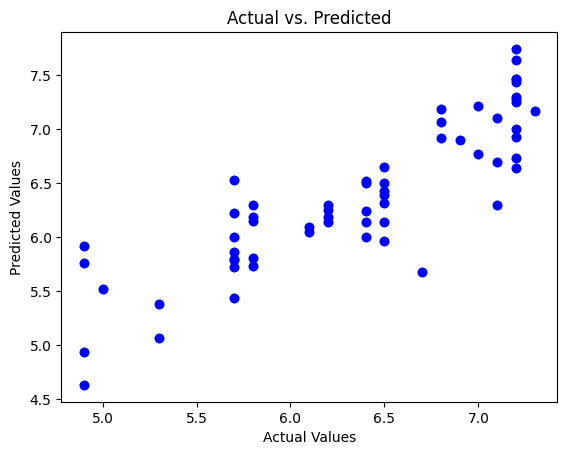

0.26901597210582967


In [ ]:
x = df['plot']
y = df['imdb_rating_updated']
process_data_vectorized(x,y)

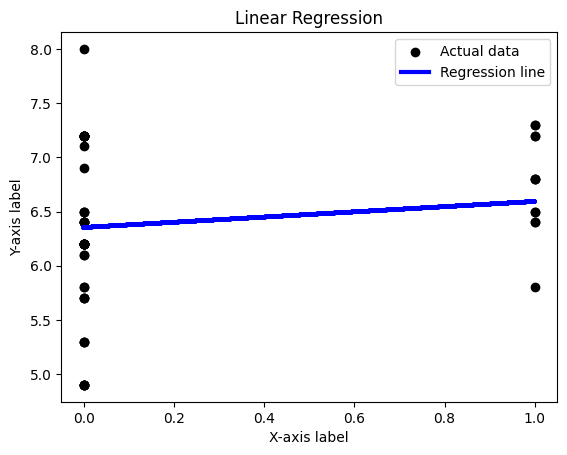

0.5585725508791458


In [ ]:
x = df['watch_count']
y = df['imdb_rating_updated']
process_data_one_hot(x,y)

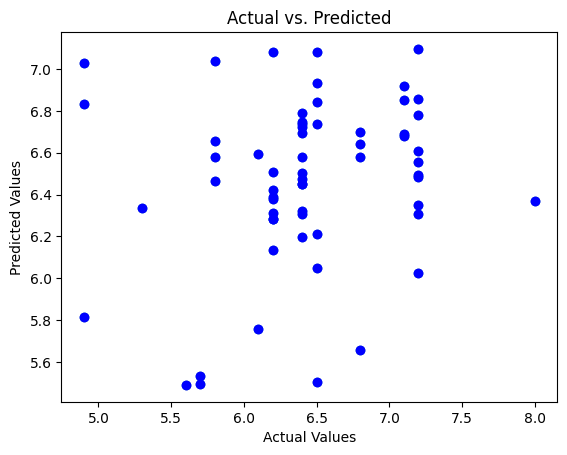

0.48867773517935775


In [ ]:
x = df['protagonist_characteristics']
y = df['imdb_rating_updated']
process_data_vectorized(x,y)

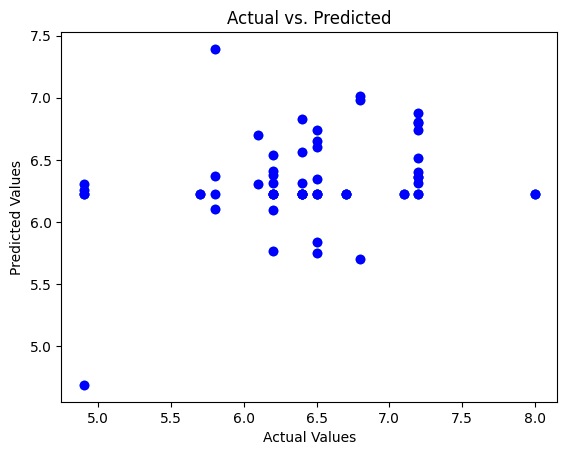

0.5255900142119343


In [ ]:
x = df['antagonist_characteristics']
y = df['imdb_rating_updated']
process_data_vectorized(x,y)

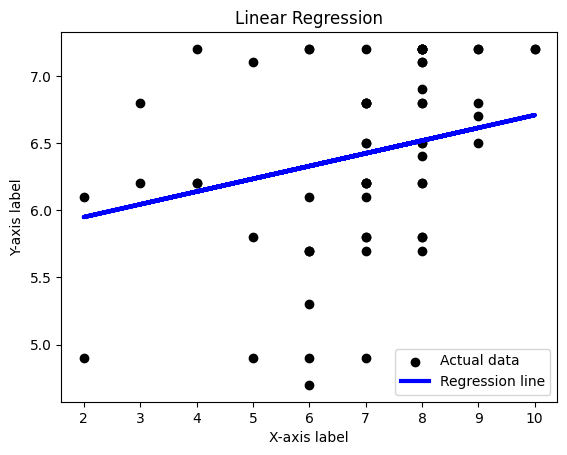

0.5378778741873775


In [ ]:
x = df['plot_investment']
y = df['imdb_rating_updated']
process_data_one_hot(x,y)

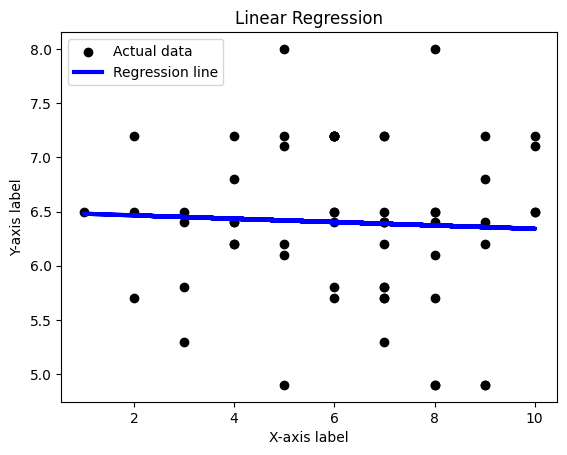

0.5614134009221748


In [ ]:
x = df['character_change']
y = df['imdb_rating_updated']
process_data_one_hot(x,y)

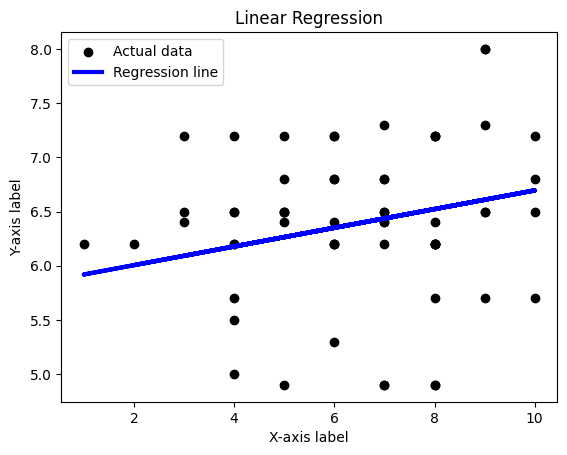

0.5494054650152791


In [ ]:
x = df['complexity']
y = df['imdb_rating_updated']
process_data_one_hot(x,y)

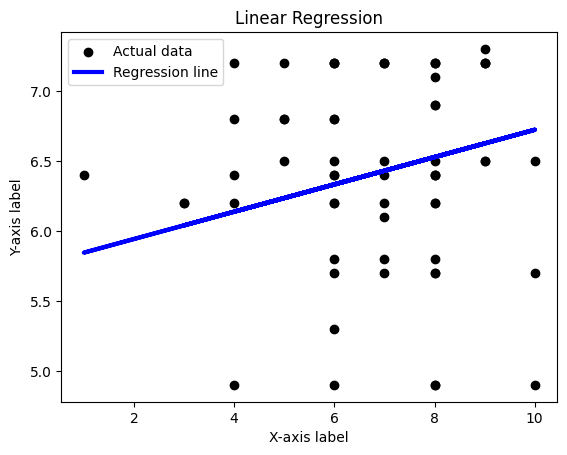

0.5630276599538894


In [ ]:
x = df['character_investment']
y = df['imdb_rating_updated']
process_data_one_hot(x,y)

In [ ]:
#x = df['perspectives']
#y = df['imdb_rating_updated']
#process_data_simple(x,y)

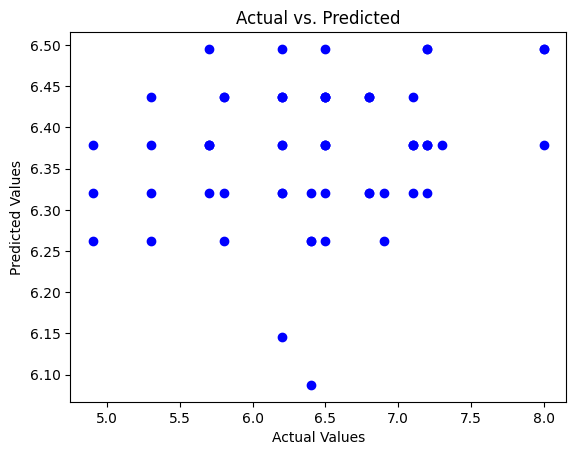

0.5690142282988723


In [ ]:
x = df['overall_pace']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

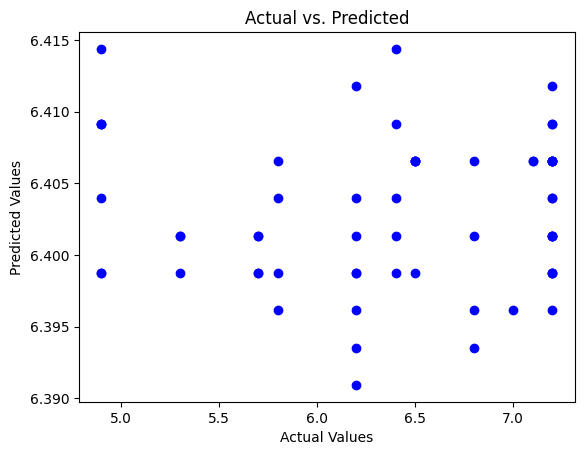

0.640577478209734


In [ ]:
x = df['beginning_pace']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

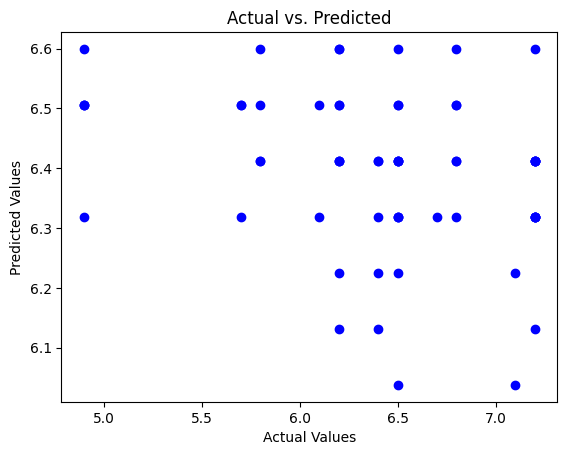

0.5300534210712903


In [ ]:
x = df['middle_pace']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

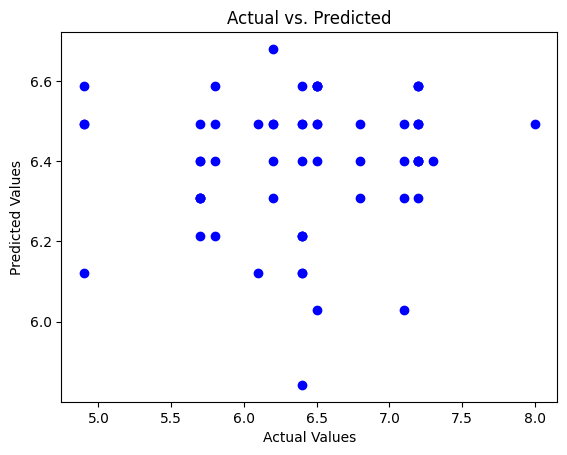

0.5462483212735852


In [ ]:
x = df['end_pace']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

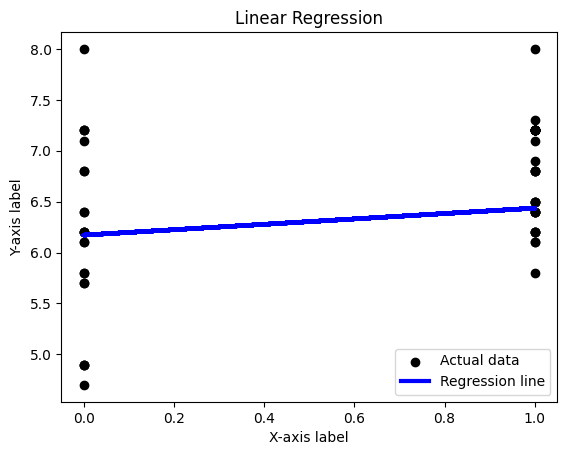

0.5439174724501082


In [ ]:
x = df['turning_point']
y = df["imdb_rating_updated"]
process_data_one_hot(x,y)

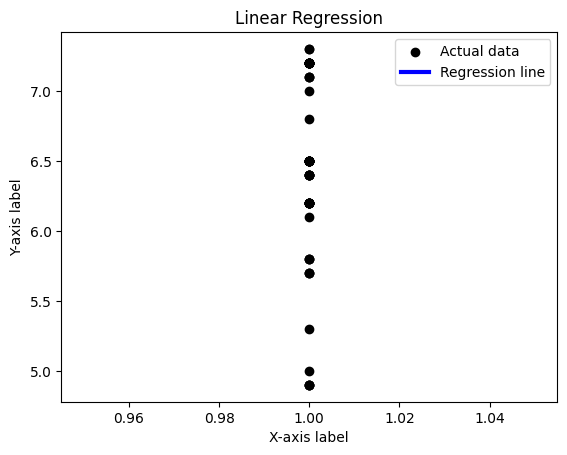

0.5148565573770492


In [ ]:
x = df['plot_twist']
y = df["imdb_rating_updated"]
process_data_one_hot(x,y)

In [ ]:
#x = df['sag_points']
#y = df['imdb_rating_updated']
#process_data_vectorized(x,y)

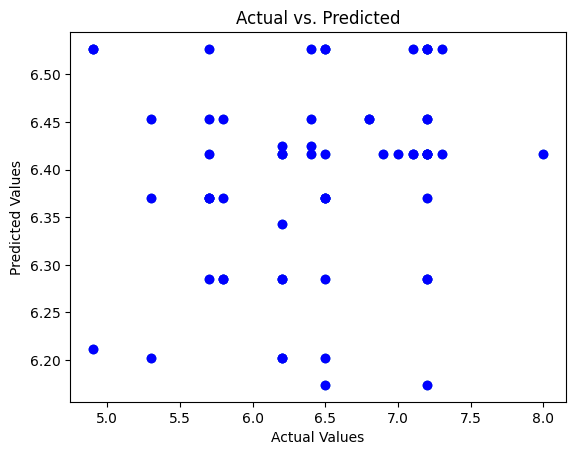

0.5674591281552108


In [ ]:
x = df['beginning_qualities']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

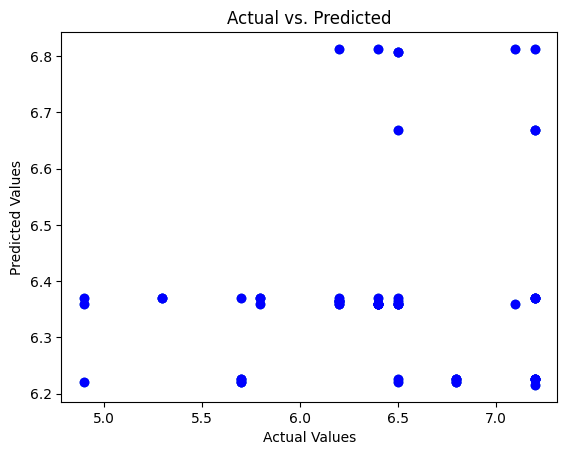

0.49238356588022203


In [ ]:
x = df['ending_qualities']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

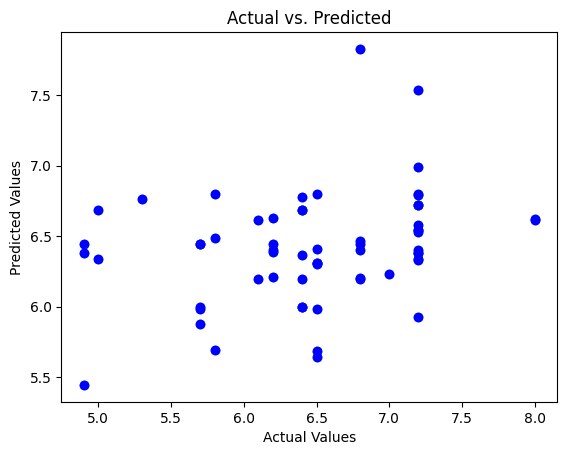

0.5922219532726876


In [ ]:
x = df['climax_qualities']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

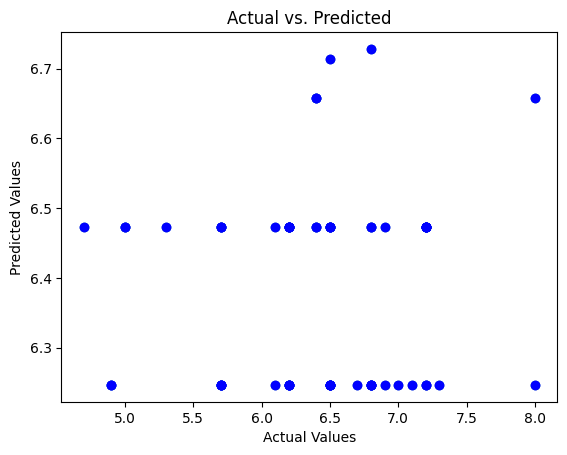

0.5558497914171814


In [ ]:
x = df['drive']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

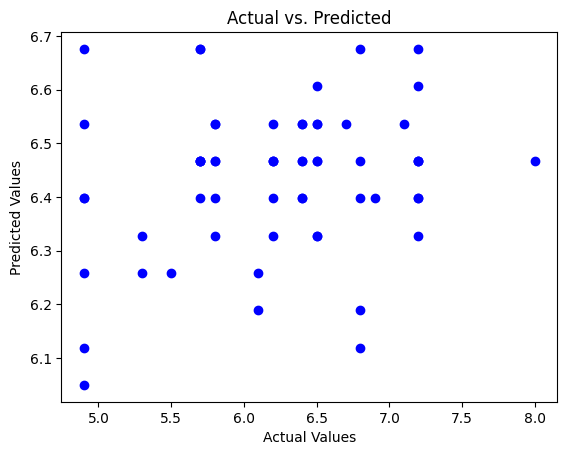

0.5893528482853646


In [ ]:
x = df['world_immersion']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

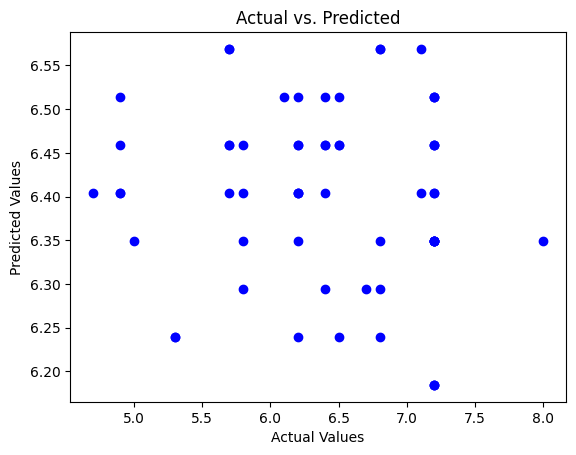

0.646104689858065


In [ ]:
x = df['immersion_importance']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

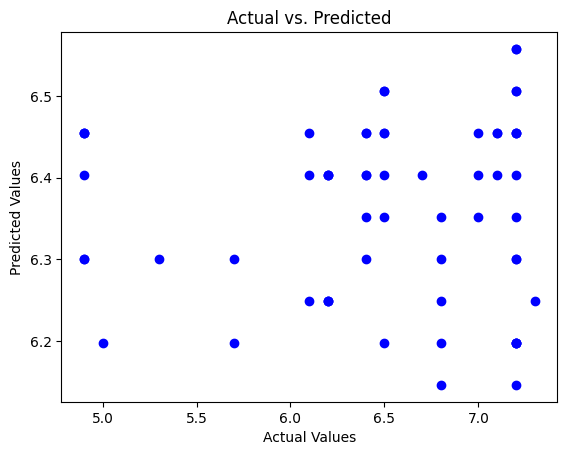

0.5907989895607687


In [ ]:
x = df['realism']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

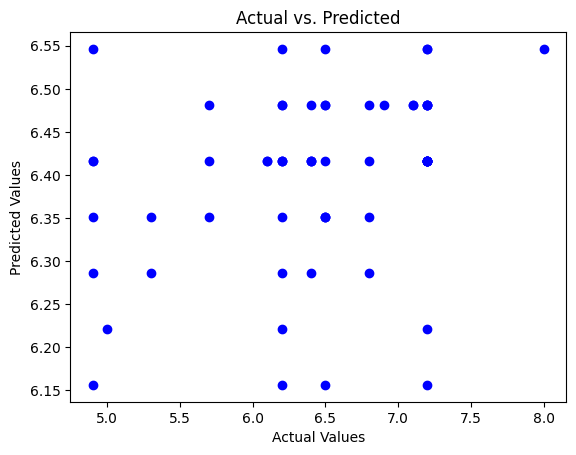

0.5757922314712385


In [ ]:
x = df['dialogue_rating']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

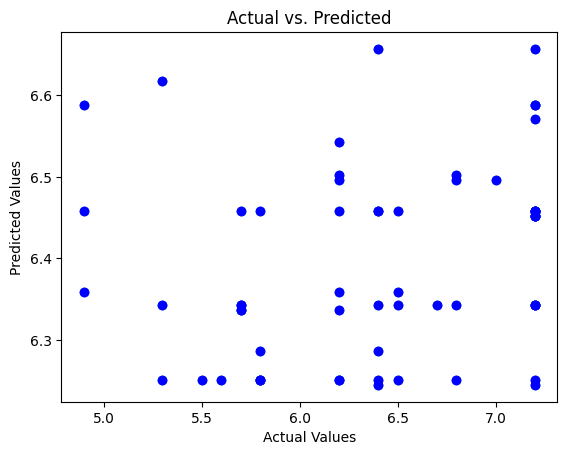

0.5624702484020243


In [ ]:
x = df['dialogue_characteristics']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

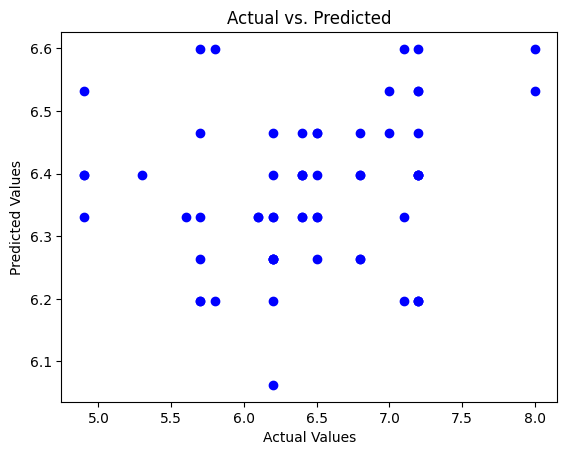

0.5347435991511208


In [ ]:
x = df['emotional_impact']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

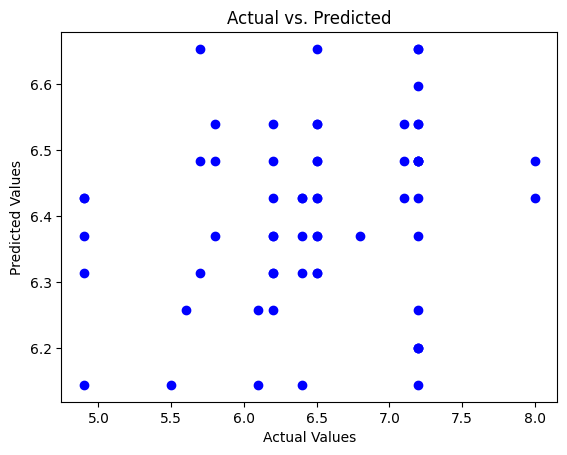

0.5544977784737307


In [ ]:
x = df['intelectual_engagement']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

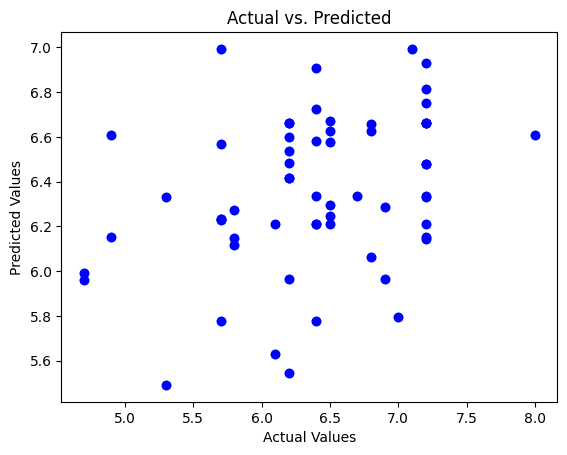

0.5478382958770486


In [ ]:
x = df['attributes']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

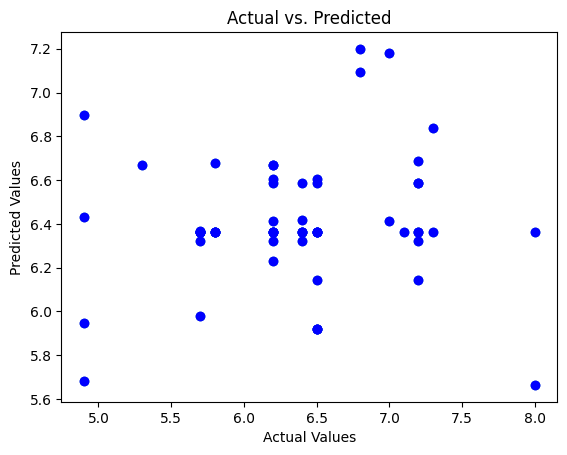

0.5512797767553022


In [ ]:
x = df['artistic_objectives']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

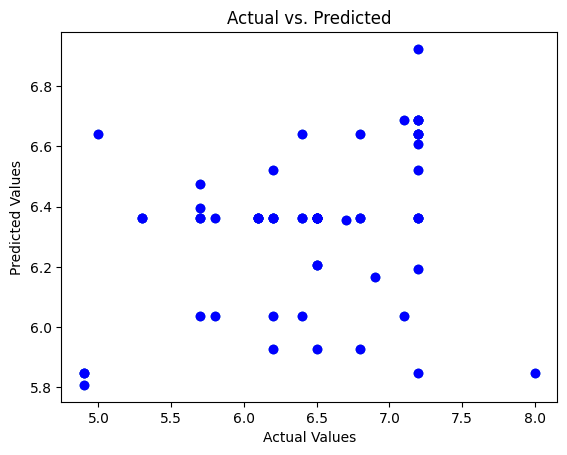

0.5241405165373169


In [ ]:
x = df['successful_objectives']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

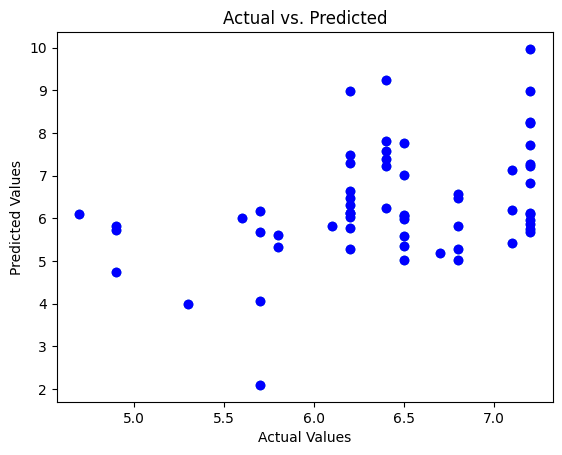

0.9451810234164655


In [ ]:
x = df['themes']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

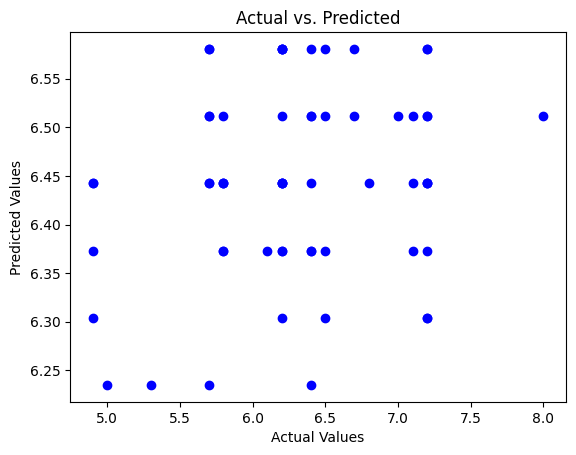

0.5581984334576184


In [ ]:
x = df['theme_clarity']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

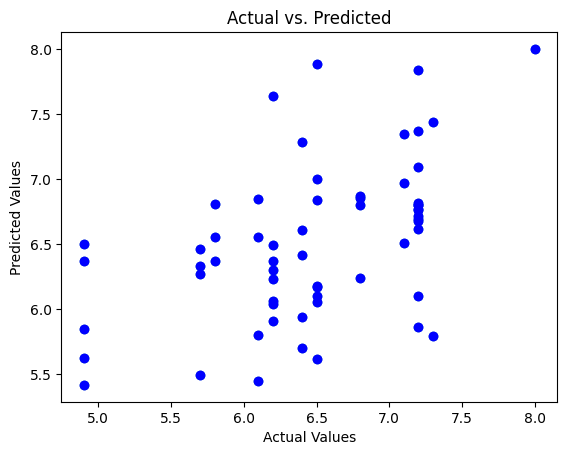

0.5278642448428531


In [ ]:
x = df['tropes']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

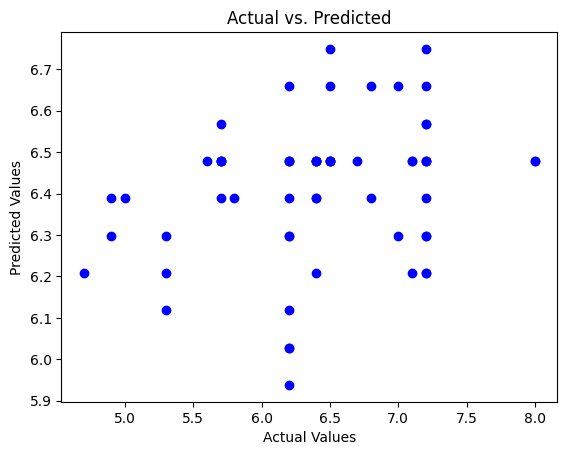

0.5581639906962668


In [ ]:
x = df['score_rating']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

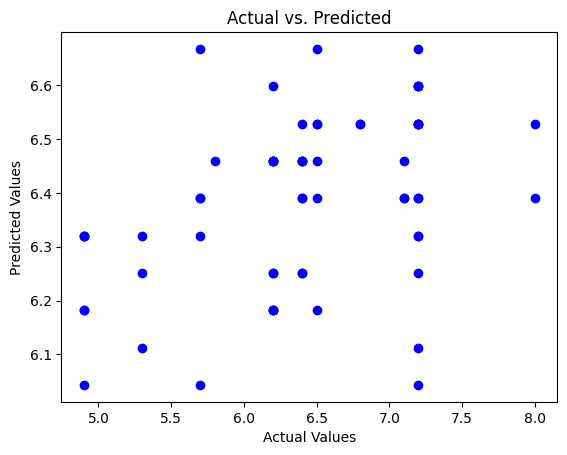

0.5723461871559762


In [ ]:
x = df['score_importance']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

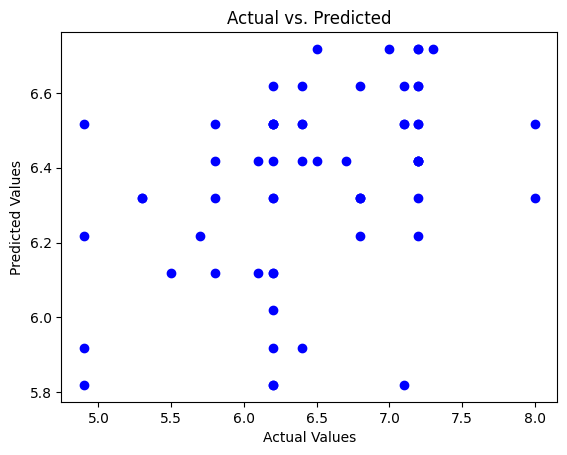

0.5454166051734037


In [ ]:
x = df['enjoyment_rating']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

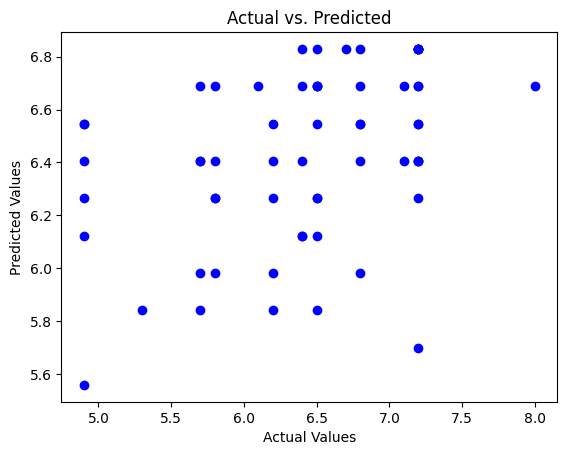

0.5398209944623771


In [ ]:
x = df['acting_rating']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

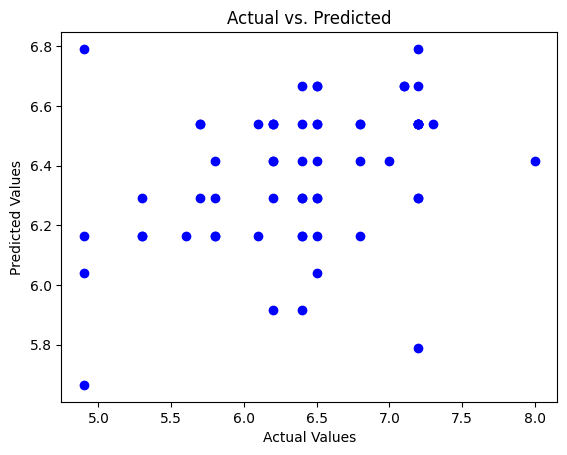

0.5173667714788697


In [ ]:
x = df['directing_rating']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

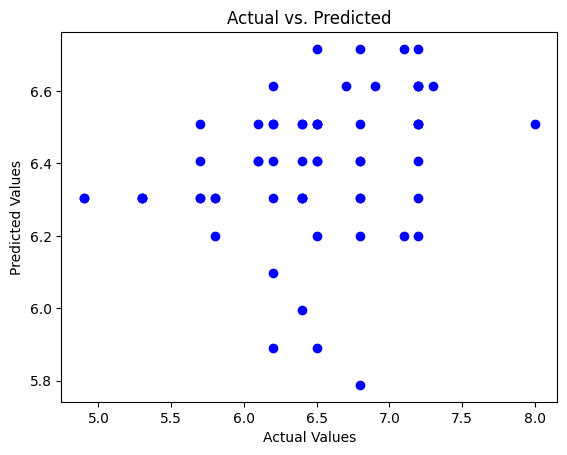

0.4851103646326699


In [ ]:
x = df['cinematography_rating']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

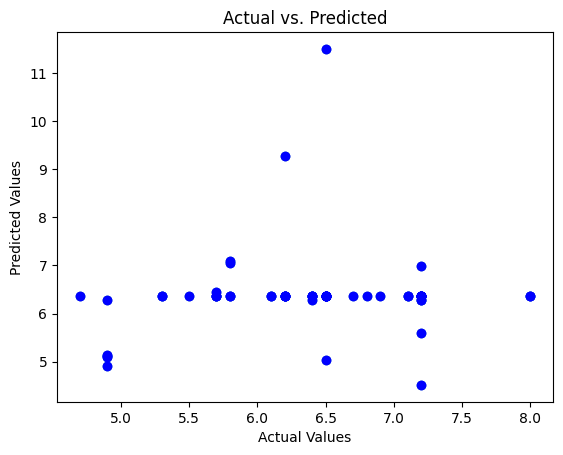

0.7288409043012078


In [ ]:
x = df['important_attributes']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

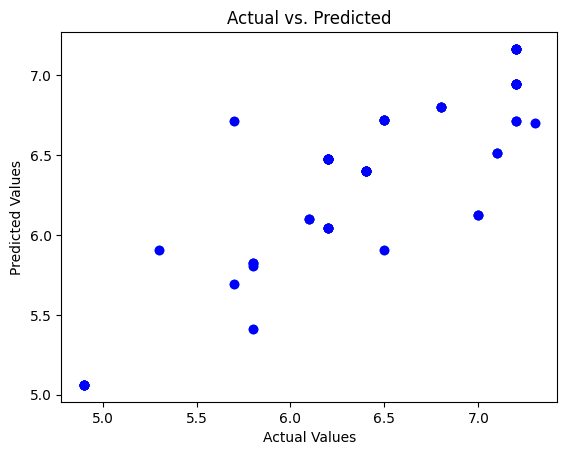

0.22455887999369392


In [ ]:
x = df['genres']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

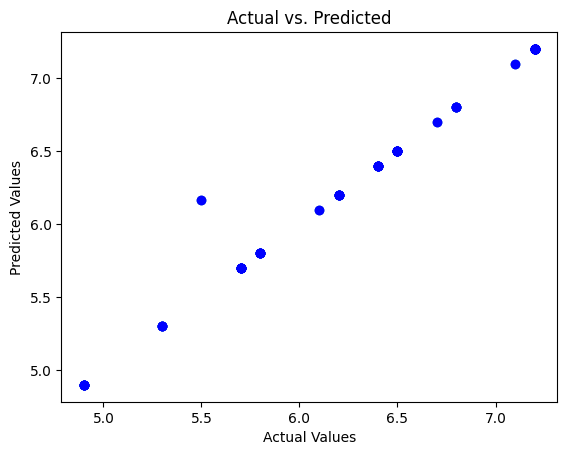

0.010912747123616999


In [ ]:
x = df['stars']
y = df["imdb_rating_updated"]
process_data_vectorized(x,y)

In [ ]:
#x = df['violencegore_score']
#y = df["imdb_rating_updated"]
#process_data_simple(x,y)

In [ ]:
#x = df['alcohol_score']
#y = df["imdb_rating_updated"]
#process_data_simple(x,y)

In [ ]:
#x = df['frightening_score']
#y = df["imdb_rating_updated"]
#process_data_simple(x,y)

In [ ]:
#x = df['profanity_score']
#y = df["imdb_rating_updated"]
#process_data_simple(x,y)

In [ ]:
#x = df['sexnude_score']
#y = df["imdb_rating_updated"]
#process_data_simple(x,y)

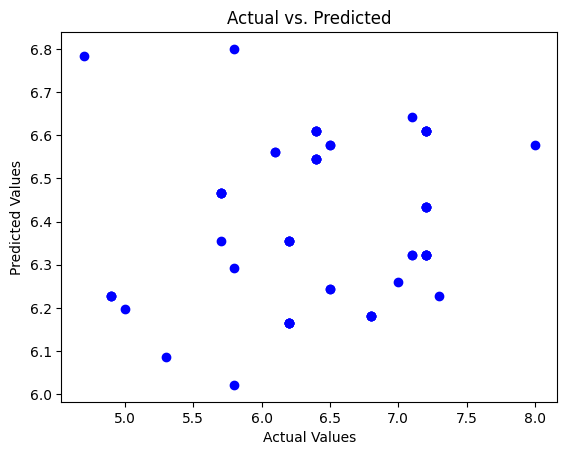

0.5805853699968945


In [ ]:
x = df['runtime']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

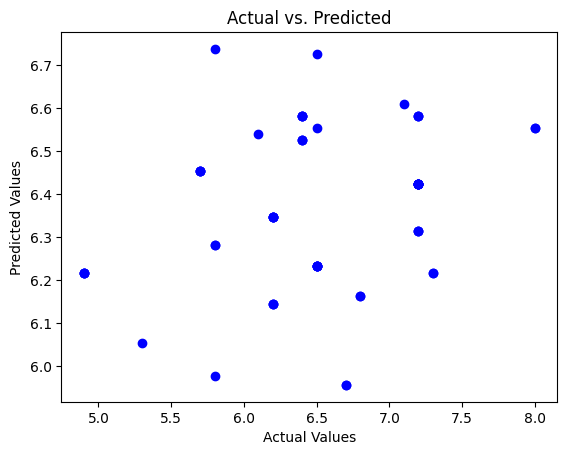

0.5777025399114216


In [ ]:
x = df['runtime_log']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

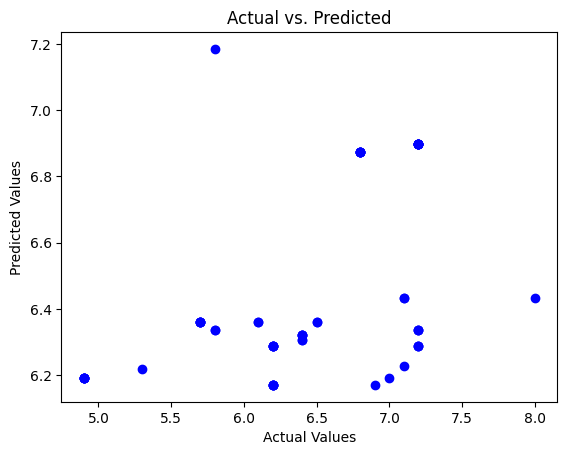

0.4885823904825771


In [ ]:
x = df['budget']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

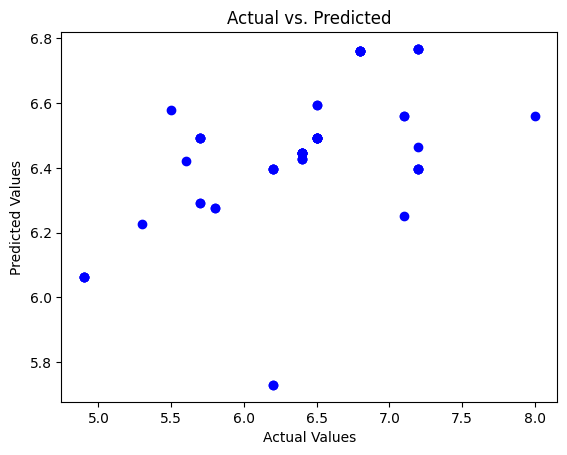

0.40158689785326696


In [ ]:
x = df['budget_log']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

In [ ]:
#x = df['opening_weekend_box_office']
#y = df["imdb_rating_updated"]
#process_data_simple(x,y)

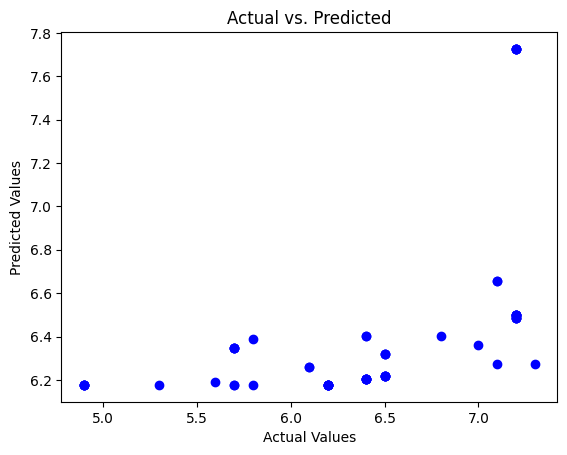

0.4822355266114982


In [ ]:
x = df['number_of_nominations']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

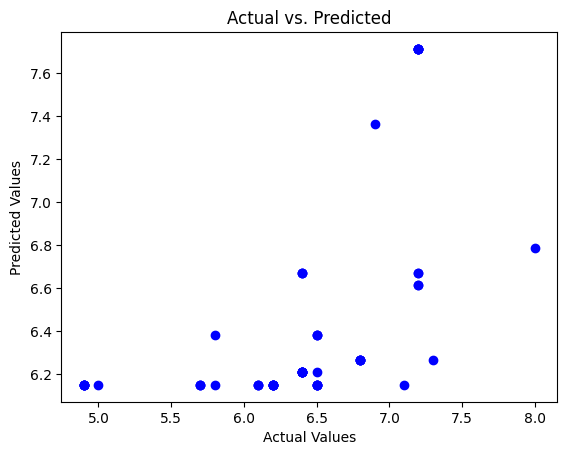

0.45604427724481805


In [ ]:
x = df['number_of_wins']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

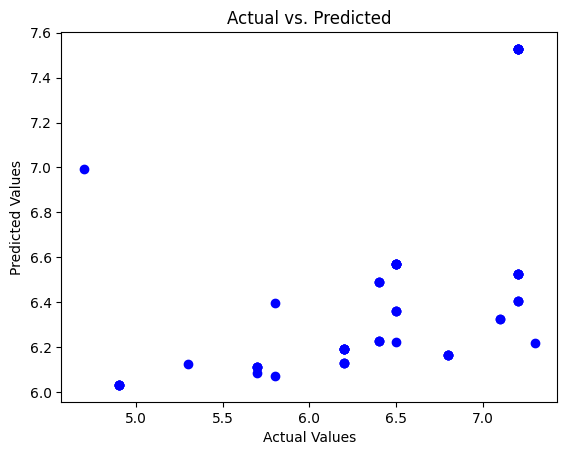

0.4439750275443043


In [ ]:
x = df['num_reviews_written']
y = df["imdb_rating_updated"]
process_data_simple(x,y)

TypeError: ignored